1. **Parse the actionability file based on your search term and create a new file that contains the following columns:  GENE, MUTATION_REMARK, DISEASE, ACTIONABILITY_RANK, DEVELOPMENT_STATUS, DRUG_COMBINATION,  PRIMARY_OUTCOME_MEASURE, TRIAL_STATUS, and PATIENT_PRESCREENING. Create a dataframe for your notebook**

First I am going to import the pandas library and define our file paths for the actionability file and output file. 

Next I will read in the actionability as a dataframe using the read method in pandas.

I will define the pattern as the words we are looking for with regex and create a new filtered dataframe with this pattern.

From this filtered dataframe I will only select the needed columns using the get_loc method, and I will output this dataframe to my text file using the to_csv method, specifying that the separator will be tabs. 

In [1]:
import pandas as pd
import re

actionability_file = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Final\ActionabilityData.tsv'
# path for actionability file

step1_outfile = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Final\step1_out.txt'
# path for the output textfile from the data frame of step 1

df = pd.read_csv(actionability_file, sep='\t')
#read in the actionability file using tabs as the delimeter

pattern = r'\b(ERBB2)\b'#the \b ensures that the whole words are matched
#this is our regular expression pattern used for searching
#parsing the file based on: Words EGFR, FGFR1, and 'lung/carcinoma/non small cell carcinoma'

filtered_df = df[df.apply(lambda row: any(re.search(pattern, str(cell)) for cell in row), axis=1)]
#I am filtering my dataframe based on my regex pattern. 
#Which will match EGFR, FGFR1 or 'lung / carcinoma / non small cell carcinoma'
#axis =1 specifies we will be going throught the rows.


output_df = filtered_df.iloc[:,[filtered_df.columns.get_loc('GENE') , filtered_df.columns.get_loc('MUTATION_REMARK'), 
                                filtered_df.columns.get_loc('DISEASE'),  filtered_df.columns.get_loc('ACTIONABILITY_RANK'), 
                                filtered_df.columns.get_loc('DEVELOPMENT_STATUS'), filtered_df.columns.get_loc('DRUG_COMBINATION'),
                                filtered_df.columns.get_loc('PRIMARY_OUTCOME_MEASURE'), filtered_df.columns.get_loc('TRIAL_STATUS'), 
                                filtered_df.columns.get_loc('PATIENT_PRESCREENING'),
                                ]]
#create an output dataframe for the specified columns.

output_df.to_csv(step1_outfile, sep='\t', index=False)
#output my dataframe

C:\Users\tiffa\AppData\Local\Temp\ipykernel_10208\3365814624.py:10: DtypeWarning: Columns (27,28,30,34,44,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(actionability_file, sep='\t')


2. **Create a scatter plot based on the gene and mutation_remark compared to the Patient_Prescreening based on whether Expression confirmed or not.**

<font color='aquamarine'> **I will be using my parsed dataframe from step one to plot** </font>

I will be using matplotlib to plot. 

First I will filter the dataframe for the columns gene and mutation remark and patient prescreening.
Then I will write out this new dataframe into an output file. 

I will plot the scatterplot with mutation remark on the x and patient prescreen resuls on the y axis. Expression confirmed will be in blue and not confirmed will be in red. 

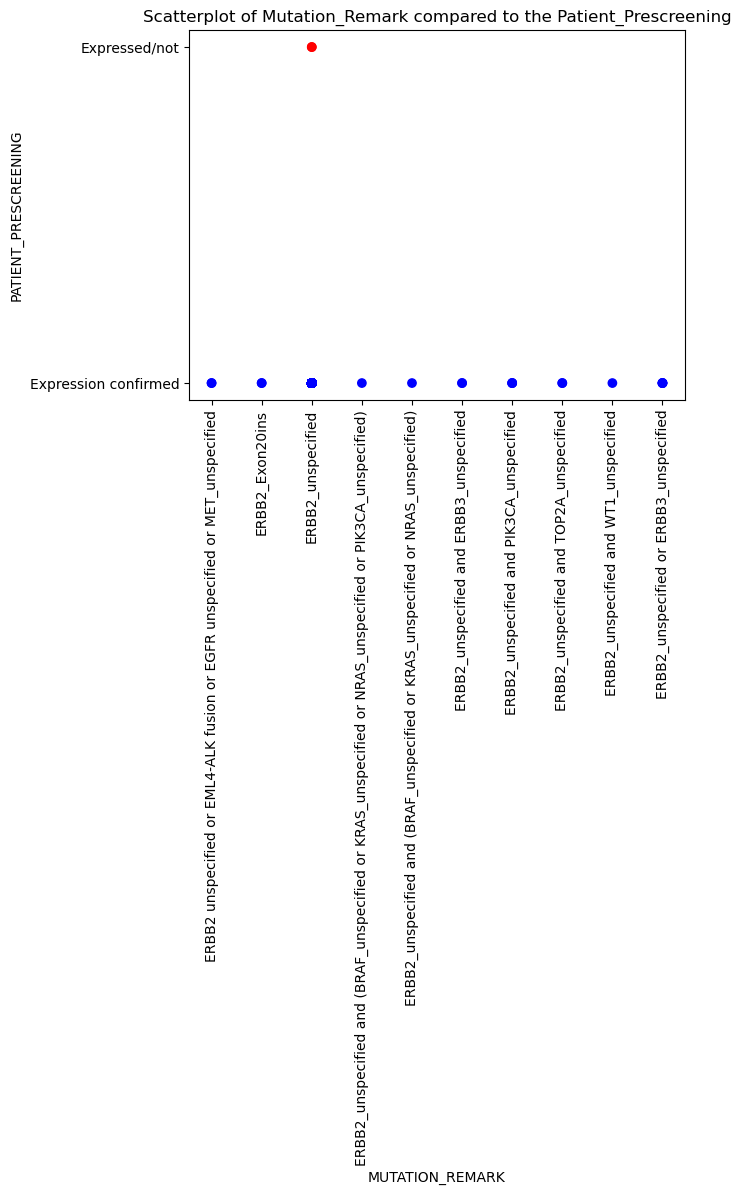

In [2]:
import matplotlib.pyplot as plt

scatter_df = output_df.iloc[:,[output_df.columns.get_loc('GENE') , output_df.columns.get_loc('MUTATION_REMARK'), 
                               output_df.columns.get_loc('PATIENT_PRESCREENING'),]]
#get only the columns we need

scatter_df = scatter_df[scatter_df['PATIENT_PRESCREENING'].isin(['Expression confirmed', 'Expressed/not'])]
#only want if the expression is confirmed or not for patient prescreening

step2_outfile = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Final\step2_out.txt'
#identify file path

scatter_df.to_csv(step2_outfile, sep='\t', index=False)
#write to an outfile

#code for plotting
plt.figure()
gene_set = set(df.iloc[:, 0])
for gene in gene_set:
    selected_data = scatter_df.loc[scatter_df.iloc[:, 0] == gene]
    colors = ['blue' if x == 'Expression confirmed' 
              else 'red' for x in selected_data['PATIENT_PRESCREENING']]
    #Assign colors to each data point

    plt.scatter(selected_data['MUTATION_REMARK'], selected_data['PATIENT_PRESCREENING'], c= colors)
plt.xlabel('MUTATION_REMARK')
plt.ylabel('PATIENT_PRESCREENING')
plt.xticks(rotation = 90) #get rid of x tick marks
plt.title('Scatterplot of Mutation_Remark compared to the Patient_Prescreening')
plt.show()


3. **Create a bar chart based on the actionability_rank and DRUG_COMBINATION, which is the treatment.  The x-axis would be the actionability_ranks and the y-axis would be the drug combinations**

<font color='aquamarine'> **I will be using the parsed dataframe from step one to plot** </font>

I am going to use the seaborn library to do my bar chart. 

I will create a dataframe with the columns needed for the bar chart. 

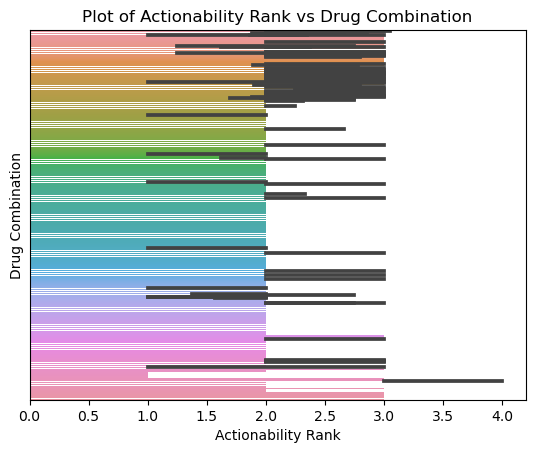

In [3]:
import seaborn as sns


bar_df = output_df.iloc[:,[output_df.columns.get_loc('ACTIONABILITY_RANK') , 
                           output_df.columns.get_loc('DRUG_COMBINATION')]]
#get only the columns we need

step3_outfile = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Final\step3_out.txt'
#identify file path

bar_df.to_csv(step3_outfile, sep='\t', index=False)
#export to an output file

plt.figure()
sns.barplot(data=bar_df, x='ACTIONABILITY_RANK', y= 'DRUG_COMBINATION')
#define the x and y axis of the plots.

plt.title("Plot of Actionability Rank vs Drug Combination")
plt.xlabel('Actionability Rank')
plt.ylabel('Drug Combination')
plt.yticks([]) #remove y tick mark labels 
plt.show()

4. **Create a BioPython session. Use entrez to search the protein and pubmed databases, return a max of 100 based on your search term. Capture the IDs, then perform and fetch the fasta sequences and articles  and return them to a file on your local machine. Create a  histogram based on the length of the fasta sequences. Load pubmed references into a dataframe.**

I will first use my email to create the entrez session. Then for both the protein and pubmed databases I will open an esearch session to create my list of ID's. Afterwards I use this list to complete an efetch operation and write the efetch objects out into a text file.

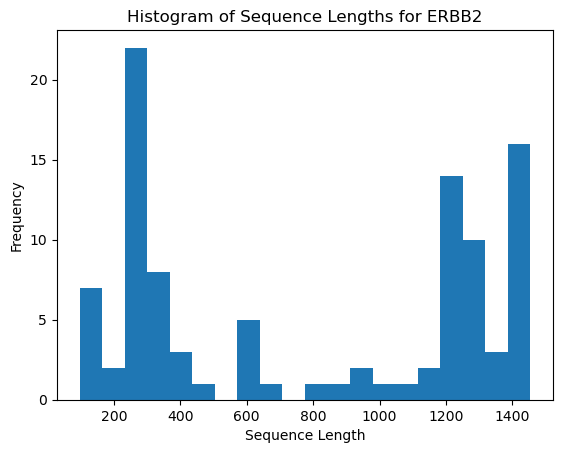

In [4]:
from Bio import Entrez, SeqIO

Entrez.email = "tt2405@nyu.edu"
#set email for entrez session

search_handle = Entrez.esearch(db="protein", term="erbb2", retmax=100)
# Open an eserch session and search the protein database for the term ERBB2 

protein_ids = Entrez.read(search_handle)['IdList']
#Capture the IDs from the search session

search_handle.close()#dont forget to close!

efetch_handle = Entrez.efetch(db="protein", id=",".join(protein_ids), rettype="fasta", retmode="text")
#create an efetch object
fasta_records = efetch_handle.read()
efetch_handle.close()

fasta_out = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Final\fasta_out.txt'
#write the file path to a variable

#write out the fasta file!
file_out = open(fasta_out, 'w')
file_out.write(fasta_records)
file_out.close()

#Create a histogram based on the length of the fasta sequences
sequence_lengths = [len(record.seq) for record in SeqIO.parse(fasta_out, "fasta")]
#list of sequences lengths for each fasta file sequence.

plt.hist(sequence_lengths, bins=20)

plt.xlabel("Sequence Length")
#varying lengths of sequences

plt.ylabel("Frequency")
#how many at each length

plt.title("Histogram of Sequence Lengths for ERBB2")
plt.show()

# Fetch articles from PubMed related to ERBB2 in the same manner that we did for erbb2 in the protein database
search_handle = Entrez.esearch(db="pubmed", term="erbb2", retmax=100)
pubmed_results = Entrez.read(search_handle)
article_ids = pubmed_results["IdList"]
search_handle.close()

pubmed_efetch_handle = Entrez.efetch(db="pubmed", id=",".join(article_ids), rettype="medline", retmode="text")
#create efetch handle object using the join method and parameters that are specified in part 9

pubmed_records = pubmed_efetch_handle.read()
#capture this data from the efetch
pubmed_efetch_handle.close()
#close the handle

# Write articles to a file
pubmed_file = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Final\pubmed_out.txt'
file_out = open(pubmed_file, 'w')
file_out.write(pubmed_records)

#Below is using the code snippet that Avinash provided me
# Assuming 'pubmed_records' is a string where each abstract is separated by a newline
abstracts_list = pubmed_records.strip().split('\n')
pubmed_df = pd.DataFrame(abstracts_list, columns=['Abstract'])


step4_outfile = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Final\step4_out.txt'

pubmed_df.to_csv(step4_outfile, sep='\t', index=False)
#export to an output file

5. **Create a Bioservices KEGG session. Use the find method and pass in the parameters 'disease' and your search term.  Capture the output based on the ID, ex. 'H01692'. Write the output to a file. Obtain the 'hsa' number, ex. 'hsa04150', and create the pathway map. Obtain the network annotation and write that a file.**

First I need to import the appropriate library and create a kegg session. After emailing the professor he responded that I could use the term 'gene' in lieu of 'disease'. 

##### <font color="red">**Since I will be searching for genes and not disease there is no 'H' number**</font>

After visualizing the results I will be using the 4th result from the search term as it lists ERBB2 first and has an HSA number. 

In [5]:
from bioservices import *

k = KEGG(verbose = False) #create the kegg object

k.dbinfo('genes')
#using the dbinfo method search for the term genes

result = k.find('genes','ERBB2')# search for the parameters genes and erbb2
print(k.find('genes','ERBB2'))# just to visualize



hsa:10766	TOB2, APRO5, TOB4, TOBL, TROB2; transducer of ERBB2, 2
hsa:55914	ERBIN, ERBB2IP, HEL-S-78, LAP2; erbb2 interacting protein
hsa:10140	TOB1, APRO5, APRO6, PIG49, TOB, TROB, TROB1; transducer of ERBB2, 1
hsa:2064	ERBB2, CD340, HER-2, HER-2/neu, HER2, MLN_19, MLN-19, NEU, NGL, TKR1, VSCN2, c-ERB-2, c-ERB2, p185(erbB2); erb-b2 receptor tyrosine kinase 2
ptr:471527	ERBIN; erbin isoform X8
ptr:454636	ERBB2; receptor tyrosine-protein kinase erbB-2 isoform X1
pps:100985381	ERBIN; erbin isoform X5
pps:100977227	ERBB2; receptor tyrosine-protein kinase erbB-2 isoform X1
ggo:101140885	ERBB2; receptor tyrosine-protein kinase erbB-2 isoform X2
ggo:101133760	ERBIN; erbin isoform X1
pon:100442384	ERBIN; erbin isoform X1
pon:100450307	ERBB2; receptor tyrosine-protein kinase erbB-2 isoform X1
nle:100602083	ERBIN; erbin isoform X3
nle:100601700	ERBB2; receptor tyrosine-protein kinase erbB-2 isoform X1
hmh:116462762	ERBIN; erbin isoform X2
hmh:116474757	ERBB2; receptor tyrosine-protein kinase erb

Here we are going to just isolate the hsa number, I am going to split the results by newlines and grabbing the 4th item, then splitting that item by white spaces and grabbing the first index. This will yield the hsa number

In [6]:
#Isolate the HSA number
num = num = result.split('\n')[3].split()[0]
#I want the third one of the list, so I will split based on newlines then Isolate the 
print(num)#just to visualize

hsa:2064


##### So you can see below that k.find('pathway', num) yield no results.

In [7]:
print(k.find('pathway', num))
#it is outputting nothing

## <font color="red">**Trying to print a pathway image for a gene is not feasible**</font>

see below the error from the code!

In [8]:
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from Bio.Graphics.ColorSpiral import ColorSpiral
from IPython.display import Image, HTML

pathway_image = Image(kegg_get(num, "image").read())
display(pathway_image)

HTTPError: HTTP Error 404: Not Found

### I will pick the first pathway from Gene ERBB2 pathway list and create a pathway image using that hsa number

In [10]:
#lets take a look at the gene information
print(k.get(num))

#I am also writting out the annotation for the gene to my outfile
step5_out = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Final\step5_out.txt'

file_out= open(step5_out, 'w')
file_out.write(k.get(num))
file_out.close()

ENTRY       2064              CDS       T01001
SYMBOL      ERBB2, CD340, HER-2, HER-2/neu, HER2, MLN_19, MLN-19, NEU, NGL, TKR1, VSCN2, c-ERB-2, c-ERB2, p185(erbB2)
NAME        (RefSeq) erb-b2 receptor tyrosine kinase 2
ORTHOLOGY   K05083  receptor tyrosine-protein kinase erbB-2 [EC:2.7.10.1]
ORGANISM    hsa  Homo sapiens (human)
PATHWAY     hsa01521  EGFR tyrosine kinase inhibitor resistance
            hsa01522  Endocrine resistance
            hsa01524  Platinum drug resistance
            hsa04010  MAPK signaling pathway
            hsa04012  ErbB signaling pathway
            hsa04020  Calcium signaling pathway
            hsa04066  HIF-1 signaling pathway
            hsa04151  PI3K-Akt signaling pathway
            hsa04510  Focal adhesion
            hsa04520  Adherens junction
            hsa04530  Tight junction
            hsa05200  Pathways in cancer
            hsa05205  Proteoglycans in cancer
            hsa05206  MicroRNAs in cancer
            hsa05212  Pancreatic cance

I am going to use the parse method to get just the first pathway entry

In [11]:
gene_dict = k.parse(k.get(num))

pathway_dict = gene_dict['PATHWAY']
first_value = next(iter(pathway_dict)) #grab the first key in the pathway dictionary

print(first_value) #just to check

hsa01521


So we have grabbed the first hsa number and it is ***hsa01521*** and it is for the pathway ***EGFR tyrosine kinase inhibitor resistance***

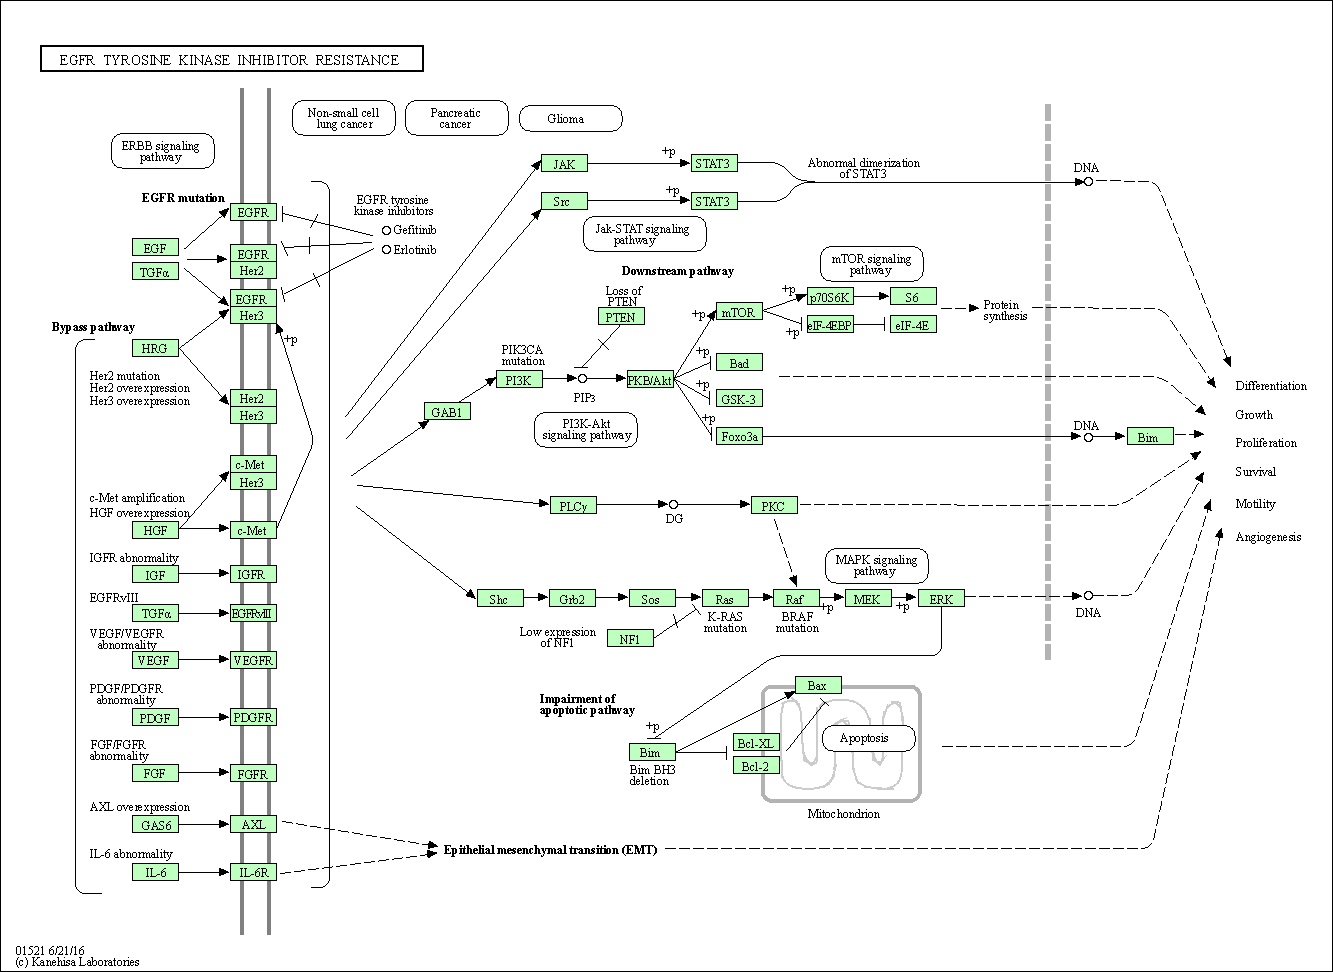

In [12]:
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from Bio.Graphics.ColorSpiral import ColorSpiral
from IPython.display import Image, HTML

#need to import the above libraries

pathway_image = Image(kegg_get(first_value, "image").read())
display(pathway_image)

6. **Create Bioservices UniProt object that uses the search method to perform a query. Ex. result = u.search("protein_name:human NameOfProtein protein AND organism_name:human, go(biological process)", frmt="tsv"). Create a dataframe for it within your notebook**

First I will create a uniprot object like we did in the lecture notes. Then following the example given I will use the search method to perform a query. I will put these results into a data frame and output the dataframe to a textfile

In [18]:
from bioservices import UniProt
from io import StringIO

u = UniProt(verbose=False) #initialize my uniprot object

# Perform a query
result = u.search("protein_name:human ERBB2 protein AND organism_name:human, go(biological process)", frmt="tsv")
#this is an example query using the example from lecture notes

# Convert the TSV result to a dataframe
uniprot_df = pd.read_csv(StringIO(result), sep='\t')


step6_outfile = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Final\step6_out.txt'

uniprot_df.to_csv(step6_outfile, sep='\t', index=False)

7. **Create a Bioservices UniProt object that does the following: result = u.search("family:'Protein Name'AND comment(DISEASE)", frmt="tsv"). Create a dataframe from the result**

In a similar manner as above I will perform the follwoing search: "family:'Protein Name'AND comment(DISEASE)"

In [16]:
u_7 = UniProt(verbose=False) #initialize my uniprot object

# Perform a query
result_7 = u_7.search("family:'Protein Name'AND comment(ERBB2)", frmt="tsv")
#this is an example query using the example from lecture notes

# Convert the TSV result to a dataframe
uniprot7_df = pd.read_csv(StringIO(result_7), sep='\t')

step7_outfile = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Final\step7_out.txt'

uniprot7_df.to_csv(step7_outfile, sep='\t', index=False)

8. **Create a function that defines an object, via bioservices or biopython, that will run a query and return a file of fasta sequences using the search term assigned to you . All sequences must be human**

The search term is ErBB2 and I will be doing with with BioPython.

First I will need to enter my email for the entrez session. THen I will define my search term and use the esearch method and will return the fasta sequences. All of this will be done in a function.

I will be using the same series of steps as I did in my step 4, but just putting it in a function.

The inputs to my function will be an individual's database, the term and their outfile path.

In [ ]:
def BioQuery(email, database, term, outfile):
    Entrez.email = email
    search_handle = Entrez.esearch(db=database, term= term, retmax=100)
    # Open an eserch session and search the protein database for the term ERBB2 

    protein_ids = Entrez.read(search_handle)['IdList']
        #Capture the IDs from the search session

    search_handle.close()#dont forget to close!

    efetch_handle = Entrez.efetch(db=database, id=",".join(protein_ids), rettype="fasta", retmode="text")
    #create an efetch object
    fasta_records = efetch_handle.read()
    #return a list of the fasta sequences
    efetch_handle.close()
    fasta_out = outfile
    #write the file path to a variable

    #write out the fasta file!
    file_out = open(fasta_out, 'w')
    file_out.write(fasta_records)
    file_out.close()

Here we are going to run our function

In [ ]:
step8_out = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Final\step8_out.txt'

BioQuery('tt2405@nyu.edu', 'protein', 'erbb2', step8_out)

9. **Perform a BioPython Search using the term 'Gefitinib'**

Using the esearch method we will search for 'Gefitinib'

In [ ]:
from Bio import Entrez

# Provide your email address to NCBI
Entrez.email = "tt2405@nyu.edu"
# Use the Entrez module to search PubMed
handle = Entrez.esearch(db="pubmed", term='Gefitinib')
record = Entrez.read(handle)
print(record["IdList"])

['38711856', '38710798', '38710335', '38705722', '38699642', '38677741', '38665031', '38662354', '38658677', '38656402', '38654239', '38649732', '38648750', '38647729', '38645413', '38643158', '38642809', '38629372', '38628708', '38626846']


10. **Parse the actionability file based on the condition that Approved FDA and lung / carcinoma / non small cell carcinoma are in the same line. If so, then create a new dataframe that consist of the gene, DISEASE, DRUG_COMBINATION,   MUTATION_REMARK, PATIENT_PRESCREENING based on expression, and PRIMARY_OUTCOME_MEASURE. Get Pathway map.** 

I am going to take the actionability file and create a df from it. Then I will parse throught the dataframe. If the line fulfills the conditions that under the column "DEVELOPMENT_STATUS" it is 'Approved FDA' and under the column 'DISEASE' it is 'lung / carcinoma / non small cell carcinoma'

If the line matches the conditions, I will write it out to my new dataframe. In this new data frame I will only include the columns: GENE, DISEASE, DRUG_COMBINATION,   MUTATION_REMARK, PATIENT_PRESCREENING based on expression, and PRIMARY_OUTCOME_MEASURE

In [19]:

actionability_df = pd.read_table(actionability_file)
#first I will read in my actionability file into a dataframe


#the column DEVELOPMENT_STATUS has to be equal to 'Approved FDA'
#the column DISEASE has to be equal to 'lung / carcinoma / non small cell carcinoma
#if these conditions are met, then we grab the columns we need and put it into our filtered dataframe. 
filtered_df = actionability_df.loc[(actionability_df['DEVELOPMENT_STATUS']=='Approved FDA')&
                                   (actionability_df['DISEASE']=='lung / carcinoma / non small cell carcinoma')][
                                       ['GENE', 'DISEASE', 'DRUG_COMBINATION', 'MUTATION_REMARK', 
                                    'PATIENT_PRESCREENING', 'PRIMARY_OUTCOME_MEASURE']]


#write out our dataframe to a text file
step10_outfile = r'C:\Users\tiffa\OneDrive\Desktop\Masters in Bioinformatics\Problem Solving\Final\step10_out.txt'
filtered_df.to_csv(step10_outfile, sep='\t', index =False)





C:\Users\tiffa\AppData\Local\Temp\ipykernel_10208\125555695.py:1: DtypeWarning: Columns (27,28,30,34,44,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  actionability_df = pd.read_table(actionability_file)


Next we will get a pathway map for non-small cell lung carcinoma through KEGG

WARNING [bioservices:keggparser:115]:  Found keyword DIS_PATHWAY, which has not special
    parsing for now. please report this issue with the KEGG 
    identifier (H00014                      Disease) into github.com/bioservices. Thanks T.C.
WARNING [bioservices:keggparser:115]:  Found keyword DIS_PATHWAY, which has not special
    parsing for now. please report this issue with the KEGG 
    identifier (H00014                      Disease) into github.com/bioservices. Thanks T.C.
WARNING [bioservices:keggparser:115]:  Found keyword DIS_PATHWAY, which has not special
    parsing for now. please report this issue with the KEGG 
    identifier (H00014                      Disease) into github.com/bioservices. Thanks T.C.
WARNING [bioservices:keggparser:115]:  Found keyword DIS_PATHWAY, which has not special
    parsing for now. please report this issue with the KEGG 
    identifier (H00014                      Disease) into github.com/bioservices. Thanks T.C.
WARNING [bioservices:keggpar

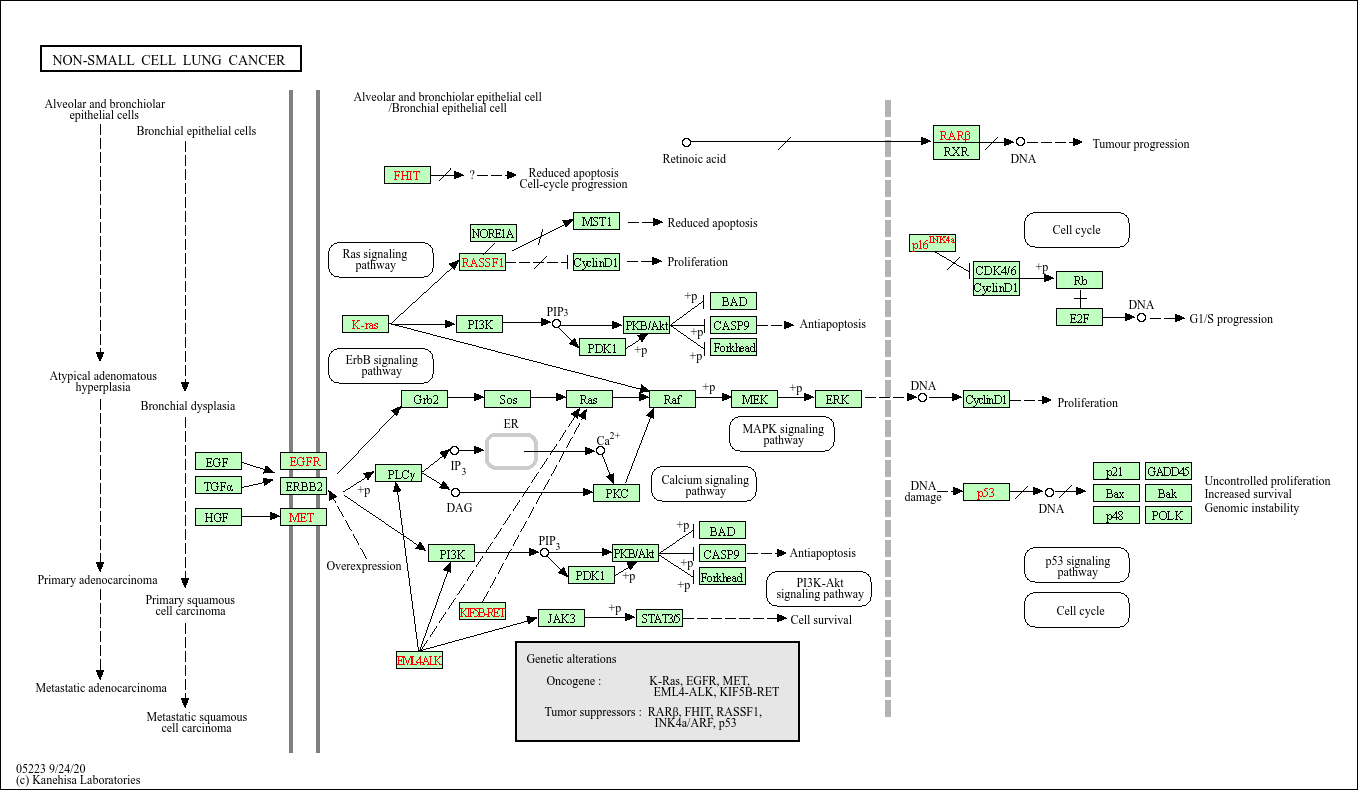

In [ ]:
#Non-small cell lung cancer is the disease term.

k = KEGG(verbose=False) #create the kegg object

search = k.find('disease', 'Non-small cell lung cancer')
num = search.split()[0].split(':')[1] #isolate the H number
query_result = k.get(num)
data_dict = k.parse(query_result)
#using the parse method as described in the official documentation
#I am going to parse out the query result into a dictionary
temp = data_dict['DIS_PATHWAY']
hsa_num = temp.split()[0]
#split temp based on white spaces and get the hsa number which is the first index
pathway_image = Image(kegg_get(hsa_num, "image").read())
display(pathway_image)

11. **Explain the reasoning behind each analysis. Why would you run an MSA on a group of proteins that are targets for non small cell carcinoma? Add it as markup to the jupyter notebook.** 

**In your own words, what's the reasoning by running the uniprot analysis.**

**What will the COSMIC ACTIONABILITY file analysis tell us? What's the purpose behind the analysis.**

Multiple sequence alignment on a group of proteins that are targets for non small cell carcinoma is beneficial for several reasons. MSA enables the identification of conserved regiouns that are crucial for protein function. It can also aid in detecting disease associate mutations an help predict functional domains within proteins. Comparing protein sequences against one another can facilitate an underanding of evolutionary and conservatory patterns. This gives researchers an insight on how the cancer proteins evolve. MSA can also reveal sequences that can be targeted by specific drugs, thus allowing for personaled treatment strategies for non small cell carcinoma. 

UniProt is a freely accessible resource of protein sequence and functional information. The reason behind the Uniprot analysis that we did in step 7 is to create a data frame of protein names and their associated disease. This allows for us to have all of this information in one dataframe where it is easily accessible. 

The aim of COSMIC Actionability is to indicate the availability of drugs that target mutations in
cancer and track the progress of clinical studies towards making new drugs available. The analysis of the file will tell us what disease/mutations are associated with what actionable events such as drug sensitivity or specific markers. It also highlights drug development efforts and progress, such a if it is appoved by the FDA or not. In the final analysis we did of the file in step 10, we can see what therapies for non small cell carcinoma have been approved by the FDA, and the associated qualities of each instance. This will advance our understanding of the disease and can inform researchers of future directions to proceed. 